In [2]:
import pandas as pd
import json

DATAFRAME_PATH = "output/linelog_20230401.tsv"
SPEAKER_JSON_PATH = "speaker.json"

df = pd.read_csv(DATAFRAME_PATH, sep="\t")
with open(SPEAKER_JSON_PATH, "r") as f:
    speaker_json = json.load(f)
df.head()

,datestr,timestr,name,content,send_type,year,month,day,weekday,hour,minute,length,param0_key,param0_val,param1_key,param1_val
0,2015/08/16(日),20:59,島谷 紫織,へーい,text,2015,8,16,日,20,59,3,url_num,0.0,url_remove_length,3.0
1,2015/08/16(日),20:59,島谷 紫織,間違えた,text,2015,8,16,日,20,59,4,url_num,0.0,url_remove_length,4.0
2,2015/08/16(日),21:00,島谷 紫織,"""新しいかばん、中身はいるねぇって意味で入るねえって言ったら、<br>じろうに風呂入るねえっ...",text,2015,8,16,日,21,0,54,url_num,0.0,url_remove_length,54.0
3,2015/08/16(日),21:00,島谷 紫織,まあいいや、風呂るね,text,2015,8,16,日,21,0,10,url_num,0.0,url_remove_length,10.0
4,2015/08/16(日),21:31,島谷二郎,うい,text,2015,8,16,日,21,31,2,url_num,0.0,url_remove_length,2.0


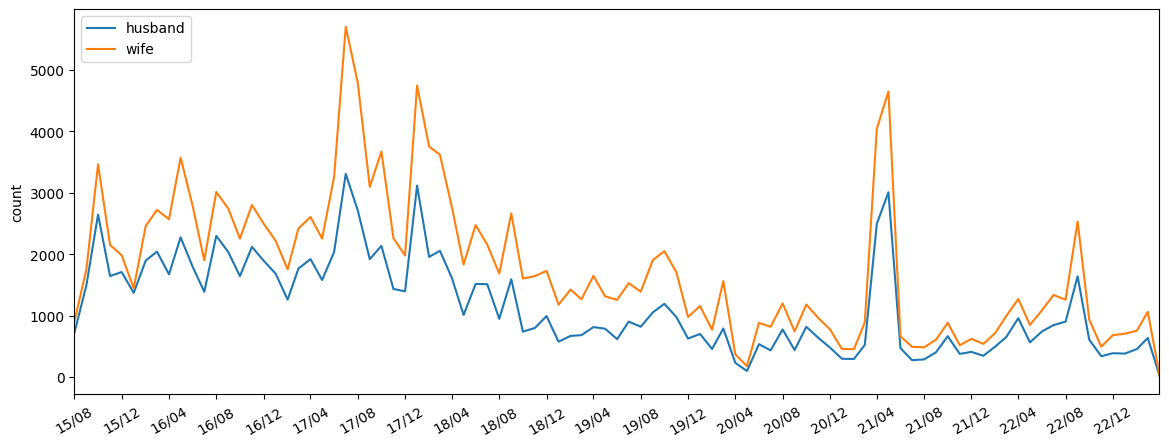

In [4]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# year, month, name, send_typeごとの投稿数を取得。カウント対象の行はなんでもよいのでdatestrとしておく
df_summary = df.groupby(["year","month","name","send_type"],as_index=False)["datestr"].count()
# わかりやすさのためdatestr列をcount列に変更
df_summary = df_summary.rename(columns = {"datestr":"count"})
# 横軸ラベルの定義をするため、yearとmonthの情報からなるdateオブジェクトの列を追加
df_summary["date"] = df_summary.apply(lambda x: datetime.date(int(x["year"]),int(x["month"]),1), axis=1)

# df_summaryのうち、send_typeのcount列を折れ線グラフ化
def show_plot(df_summary, send_type, speaker_json
              ,*
              ,figsize=(40,5)
              ,interval=1
              ,ylabel="count"
              , start_date=None
              , end_date=None):

  # 投稿者名を定義。今回は夫婦のトークなので、wife, husbandという変数名にしている。
  wife,husband = speaker_json["wife"], speaker_json["husband"]
  # df_summaryのうちsend_typeが与えられたものと一致する行のみ抽出し、name列に関してpivotする
  df_summary = df_summary.query("send_type=='{}'".format(send_type)).pivot_table(index="date",columns="name",values="count")
  
  # グラフの描画オブジェクトを取得
  fig, ax = plt.subplots(figsize=figsize)
  # 夫の折れ線グラフを表示
  # 横軸をdate (=df_summaryのindex)とする。
  ax.plot(df_summary.index,df_summary[husband],label="husband")
  # 妻の折れ線グラフを表示
  ax.plot(df_summary.index,df_summary[wife],label="wife")
  # 縦軸のタイトルを定義
  ax.set_ylabel(ylabel)
  # 凡例を表示
  plt.legend(loc=2)
  
  # 横軸のラベルを３０度回転する
  plt.xticks(rotation=30)
  # 横軸ラベルの日付フォーマットを指定
  Minute_fmt = mdates.DateFormatter('%y/%m')  # yy/mmの形式
  ax.xaxis.set_major_formatter(Minute_fmt)
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interval))# 横軸ラベルをintervalの間隔で表示
  # 横軸の範囲を指定
  start_date = start_date or df_summary.index[0]
  end_date = end_date or df_summary.index[-1]
  ax.set_xlim([start_date,end_date])
# df_summaryのsend_type=textの投稿回数をグラフ化
show_plot(df_summary, "text", speaker_json, figsize=(14,5),interval=4,ylabel="count"
          ,start_date=datetime.date(2015,8,1),end_date=datetime.date(2023,3,31)
          )


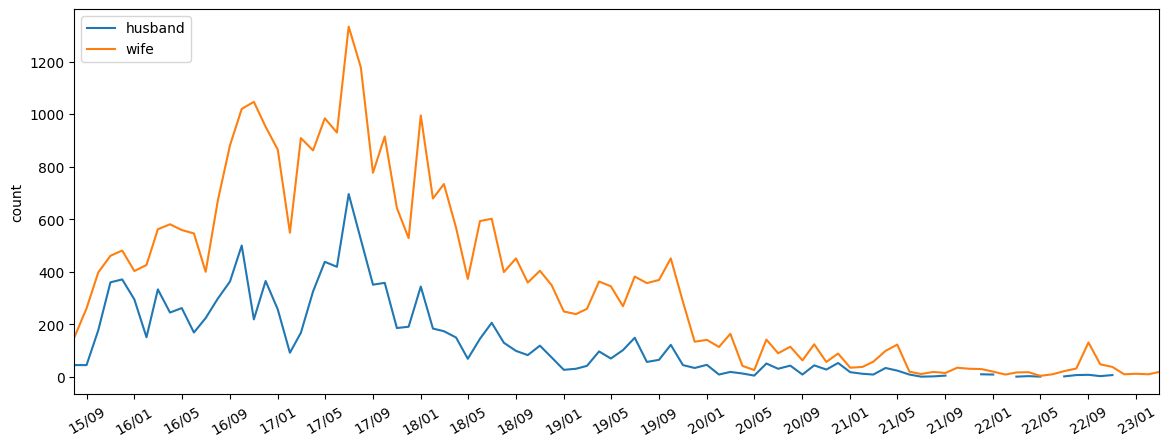

In [5]:
show_plot(df_summary, "スタンプ", speaker_json,figsize=(14,5),interval=4)

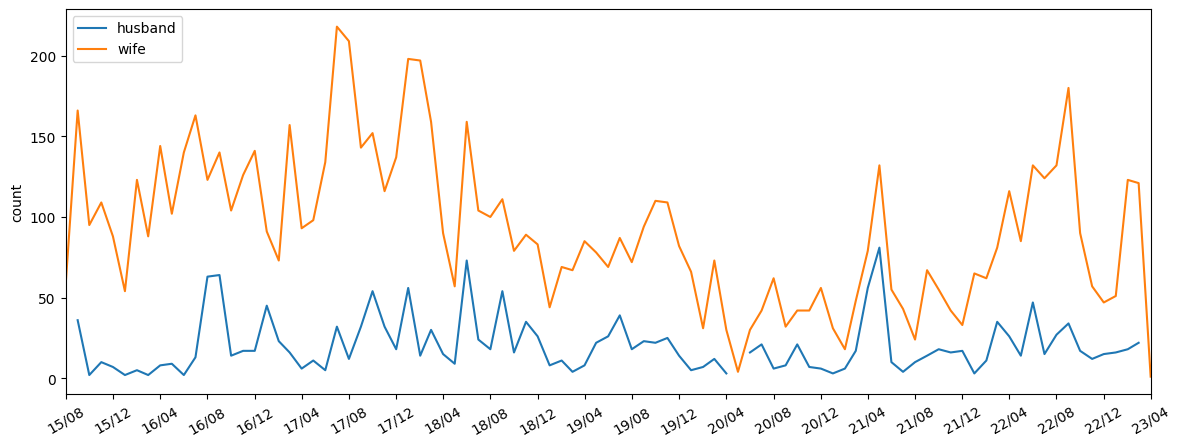

In [6]:
show_plot(df_summary, "写真",speaker_json, figsize=(14,5),interval=4)

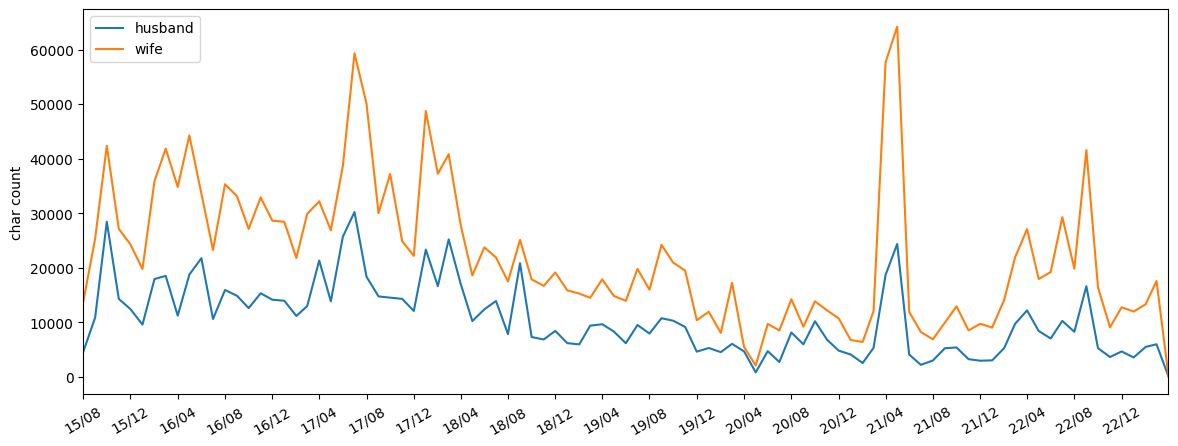

In [7]:
# year, month, name, send_typeごとに、param1_valの合計値を取得（send_type=textの場合、param1_valにはurlを除いた文字数が入る）
df_summary = df.groupby(["year","month","name","send_type"],as_index=False)["param1_val"].sum()
# param1_valの列名をcountに変更(関数show_plotがcount列をグラフ化する用に作られているため)
df_summary = df_summary.rename(columns = {"param1_val":"count"})
# yearとmonthの情報からなるdateオブジェクトの列を追加
df_summary["date"] = df_summary.apply(lambda x: datetime.date(int(x["year"]),int(x["month"]),1), axis=1)

# 月および投稿者ごとのparam1_val(send_type=textの場合はurlを除いた文字数)の合計値を折れ線グラフ化
show_plot(df_summary, "text", speaker_json
          ,figsize=(14,5),interval=4,ylabel="char count"
          ,start_date=datetime.date(2015,8,1),end_date=datetime.date(2023,3,31)
)

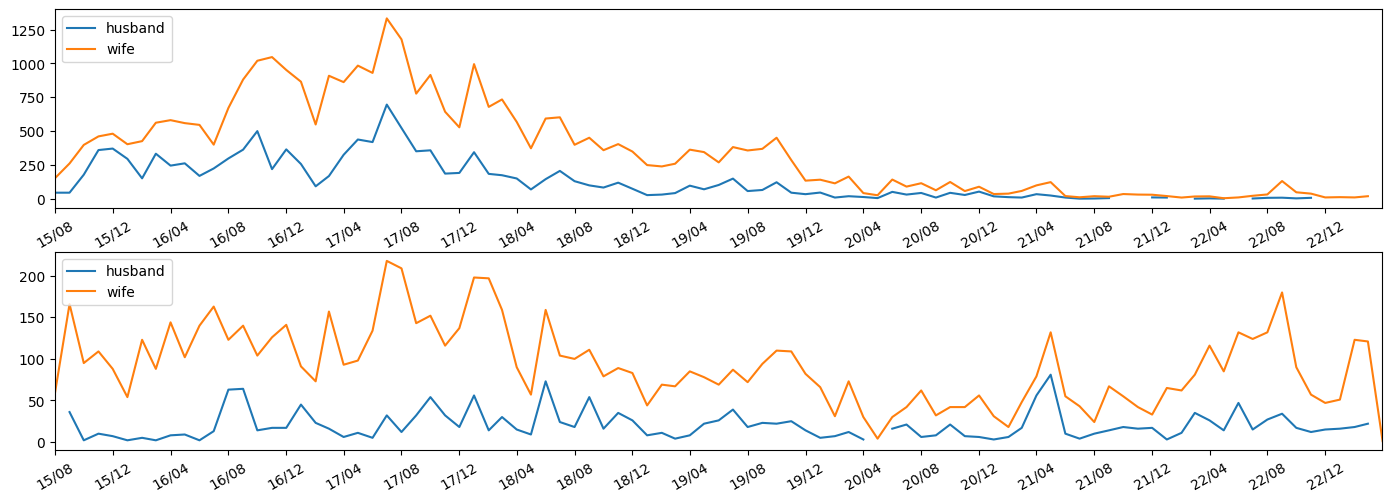

In [8]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# １つ目のグラフ用のdf_summaryを作成
df_summary = df.groupby(["year","month","name","send_type"],as_index=False)["datestr"].count()
df_summary = df_summary.rename(columns = {"datestr":"count"})
df_summary["date"] = df_summary.apply(lambda x: datetime.date(int(x["year"]),int(x["month"]),1), axis=1)

# ２つめのグラフ用のdf_summaryを必要に応じて作成（df_summaryと兼ねられる場合もある）
df_summary2 = df.groupby(["year","month","name","send_type"],as_index=False)["param1_val"].sum()
df_summary2 = df_summary2.rename(columns = {"param1_val":"count"})
df_summary2["date"] = df_summary2.apply(lambda x: datetime.date(int(x["year"]),int(x["month"]),1), axis=1)

# 折れ線グラフを立てに並べて表示
def show_double_plot(df_summary, send_type,df_summary2,send_type2, speaker_json
                     , *
                     , figsize=(40,5)
                     ,interval=1
                     , start_date: datetime.date = None
                     , end_date: datetime.date = None):
  # start_date, end_dateを指定しない場合は、df_summaryの最初と最後の日付を指定
  start_date = start_date or df_summary.index[0]
  end_date = end_date or df_summary.index[-1]

  # グラフの間を開ける
  wife,husband = speaker_json["wife"], speaker_json["husband"]
  df_summary = df_summary.query("send_type=='{}'".format(send_type)).pivot_table(index="date",columns="name",values="count")
  df_summary2 = df_summary2.query("send_type=='{}'".format(send_type2)).pivot_table(index="date",columns="name",values="count")
  #df_summary = df_summary[["島谷 紫織", "島谷二郎"]]

  # グラフの描画オブジェクトを取得。２行１列のグラフを作成
  fig, ax = plt.subplots(2,1,figsize=figsize)
  # 上下のグラフが重ならないように間隔を設定
  fig.tight_layout()

  # １つ目のグラフにhusbandの値を描画
  ax[0].plot(df_summary.index,df_summary[husband],label="husband")
  # １つ目のグラフにwifeの値を描画
  ax[0].plot(df_summary.index,df_summary[wife],label="wife")  
  
  # １つ目のグラフの横軸ラベルを設定
  Minute_fmt = mdates.DateFormatter('%y/%m')  
  ax[0].xaxis.set_major_formatter(Minute_fmt)
  ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
  ax[0].legend(loc=2)
  ax[0].xaxis.set_tick_params(rotation=30)
  # 横軸の範囲を指定
  ax[0].set_xlim(start_date,end_date)
  # 縦軸グラフの設定（不要な場合はコメントアウト）
  #ax[0].set_ylabel("text length")

  # ２つ目のグラフにhusbandの値を描画
  ax[1].plot(df_summary2.index,df_summary2[husband],label="husband")
  # ２つ目のグラフにwifeの値を描画
  ax[1].plot(df_summary2.index,df_summary2[wife],label="wife")  
  
  # 2つ目のグラフの横軸ラベルを設定
  Minute_fmt = mdates.DateFormatter('%y/%m')  
  ax[1].xaxis.set_major_formatter(Minute_fmt)
  ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
  ax[1].legend(loc=2)
  ax[1].xaxis.set_tick_params(rotation=30)
  # 横軸の範囲を指定
  ax[1].set_xlim([start_date, end_date])
  # 縦軸グラフの設定（不要な場合はコメントアウト）
  #ax[1].set_ylabel("stamp count")

# テキスト投稿の文字数と写真の投稿数の比較グラフを作成
#show_double_plot(df_summary2, "text",df_summary, "写真"
show_double_plot(df_summary, "スタンプ",df_summary, "写真", speaker_json
                 ,figsize=(14,5)
                 ,interval=4
                 ,start_date=datetime.date(2015,8,1)
                  ,end_date=datetime.date(2023,3,31)
                  )
